## Chest X-ray Image Classification (Covid-19 & Pneumonia)

<b>Download the dataset from:</b> https://www.kaggle.com/datasets/prashant268/chest-xray-covid19-pneumonia 

<b>TO-DO TASKS</b>
<ul>
    <li><b>Dataset Exploration and Preprocessing</b> (Download and explore the datasetUnderstand the structure of the dataset (e.g., file formats, labels, metadata).
Perform basic image preprocessing (e.g., resizing, normalization).
Split the dataset into training and testing sets.)</li>
    <li><b>Model Selection and Architecture Design:</b> Choose a suitable architecture (e.g., Convolutional Neural Network - CNN) + Justify the choice based on the nature of the problem and available resources + Decide on the number of layers, filters, etc.</li>
    <li> <b>Model Implementation and Training</b>: Set up the neural network architecture using a deep learning framework (e.g., TensorFlow, PyTorch) + Define loss function, optimizer, and any necessary metrics + Train the model on the training set and monitor performance.</li>
    <li><b>Hyperparameter Tuning:</b> Adjust learning rate, batch size, and other hyperparameters + Monitor the effect on model convergence and performance.</li>
    <li><b>Evaluation Metrics and Analysis:</b> Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) + Evaluate the model on the test set and provide a detailed analysis of results.</li>
    <li><b>Data Augmentation:</b> Implement data augmentation to artificially increase the size of the training dataset and improve the model's robustness. Specific Tasks: Apply techniques such as rotation, flipping, zooming, and translation to the training images. Ensure that the augmented images are appropriately labeled. Re-train the model with the augmented dataset and evaluate its impact on performance.</li>
    <li><b>Transfer Learning</b>
Description: Introduce transfer learning to leverage the knowledge gained from pre-trained models on a similar task.
Specific Tasks:
Choose a pre-trained model (e.g., ResNet, VGG, Inception) with weights trained on a large-scale dataset (e.g., ImageNet).
Remove the top layers of the pre-trained model and add a custom head for classification.
Fine-tune the model on the chest X-ray dataset.
Compare the performance of the fine-tuned model with the original model.</li>
</ul>

### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import glob as gl

In [26]:
DATASET_PATH="./chest-x-ray-data"
TRAIN_PATH="./chest-x-ray-data/train/"
TEST_PATH="./chest-x-ray-data/test/"

In [27]:
# Generate a summary of the dataset

print('Dataset Summary')
print("============================\n")
for dirpath,dirnames,filenames in os.walk(DATASET_PATH):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")
print('\n========================')

Dataset Summary

There are 2 directories and 0 images in ./chest-x-ray-data
There are 3 directories and 0 images in ./chest-x-ray-data\test
There are 0 directories and 116 images in ./chest-x-ray-data\test\COVID19
There are 0 directories and 317 images in ./chest-x-ray-data\test\NORMAL
There are 0 directories and 855 images in ./chest-x-ray-data\test\PNEUMONIA
There are 3 directories and 0 images in ./chest-x-ray-data\train
There are 0 directories and 460 images in ./chest-x-ray-data\train\COVID19
There are 0 directories and 1266 images in ./chest-x-ray-data\train\NORMAL
There are 0 directories and 3418 images in ./chest-x-ray-data\train\PNEUMONIA



In [28]:
# Getting tain and test images
train_images= gl.glob(f'{TRAIN_PATH}**/*.jpg')
test_images= gl.glob(f'{TEST_PATH}**/*.jpg')

In [29]:
test_images[0]

'./chest-x-ray-data/test\\COVID19\\COVID19(460).jpg'

In [30]:
test_images[0].replace("\\", '/')

'./chest-x-ray-data/test/COVID19/COVID19(460).jpg'

In [31]:
train_images = [s.replace("\\", "/") for s in train_images]
test_images = [s.replace("\\", "/") for s in test_images]

In [32]:
# Size of train and test sets
print("Total number of training examples: ", len(train_images))
print("Total number of test examples: ", len(test_images))

Total number of training examples:  5144
Total number of test examples:  1288


In [33]:
test_images[0].split('/')[-2:]

['COVID19', 'COVID19(460).jpg']

In [36]:
def generate_labels(image_paths):
    return[_.split('/')[-2:][0] for _ in image_paths]

def build_df(image_paths,labels):
    
    #Creating the dataframe
    df=pd.DataFrame({
        'image_path':image_paths,
        'label':generate_labels(labels)
    })
    
    #generate label encoding
    df['label_encoded'] = df['label'].apply(lambda label_encoded: 1 if label_encoded == 'NORMAL' else (2 if label_encoded == 'COVID19' else 3) )

    return df

In [37]:
train_df = build_df(train_images,generate_labels(train_images))
test_df = build_df(test_images,generate_labels(test_images))

In [38]:
train_df.label.value_counts()

label
PNEUMONIA    3418
NORMAL       1266
COVID19       460
Name: count, dtype: int64

In [39]:
test_df.label.value_counts()

label
PNEUMONIA    855
NORMAL       317
COVID19      116
Name: count, dtype: int64

In [40]:
train_df.sample(10)

,image_path,label,label_encoded
4076,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(3...,PNEUMONIA,3
3562,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(2...,PNEUMONIA,3
2655,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(1...,PNEUMONIA,3
4394,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(3...,PNEUMONIA,3
606,./chest-x-ray-data/train/NORMAL/NORMAL(1129).jpg,NORMAL,1
4182,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(3...,PNEUMONIA,3
1987,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(1...,PNEUMONIA,3
177,./chest-x-ray-data/train/COVID19/COVID19(258).jpg,COVID19,2
2291,./chest-x-ray-data/train/PNEUMONIA/PNEUMONIA(1...,PNEUMONIA,3
1094,./chest-x-ray-data/train/NORMAL/NORMAL(43).jpg,NORMAL,1


In [41]:
test_df.sample(10)

,image_path,label,label_encoded
1089,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(40...,PNEUMONIA,3
193,./chest-x-ray-data/test/NORMAL/NORMAL(1343).jpg,NORMAL,1
743,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(37...,PNEUMONIA,3
1003,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(39...,PNEUMONIA,3
14,./chest-x-ray-data/test/COVID19/COVID19(474).jpg,COVID19,2
1104,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(40...,PNEUMONIA,3
577,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(35...,PNEUMONIA,3
1148,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(41...,PNEUMONIA,3
521,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(35...,PNEUMONIA,3
738,./chest-x-ray-data/test/PNEUMONIA/PNEUMONIA(37...,PNEUMONIA,3


In [42]:
def load_image(image_path):
    # Read image file from the image_path
    image=tf.io.read_file(image_path)
    
    # Return image
    return image

In [43]:
train_df.image_path[5]

'./chest-x-ray-data/train/COVID19/COVID19(102).jpg'

Image Label:  COVID19


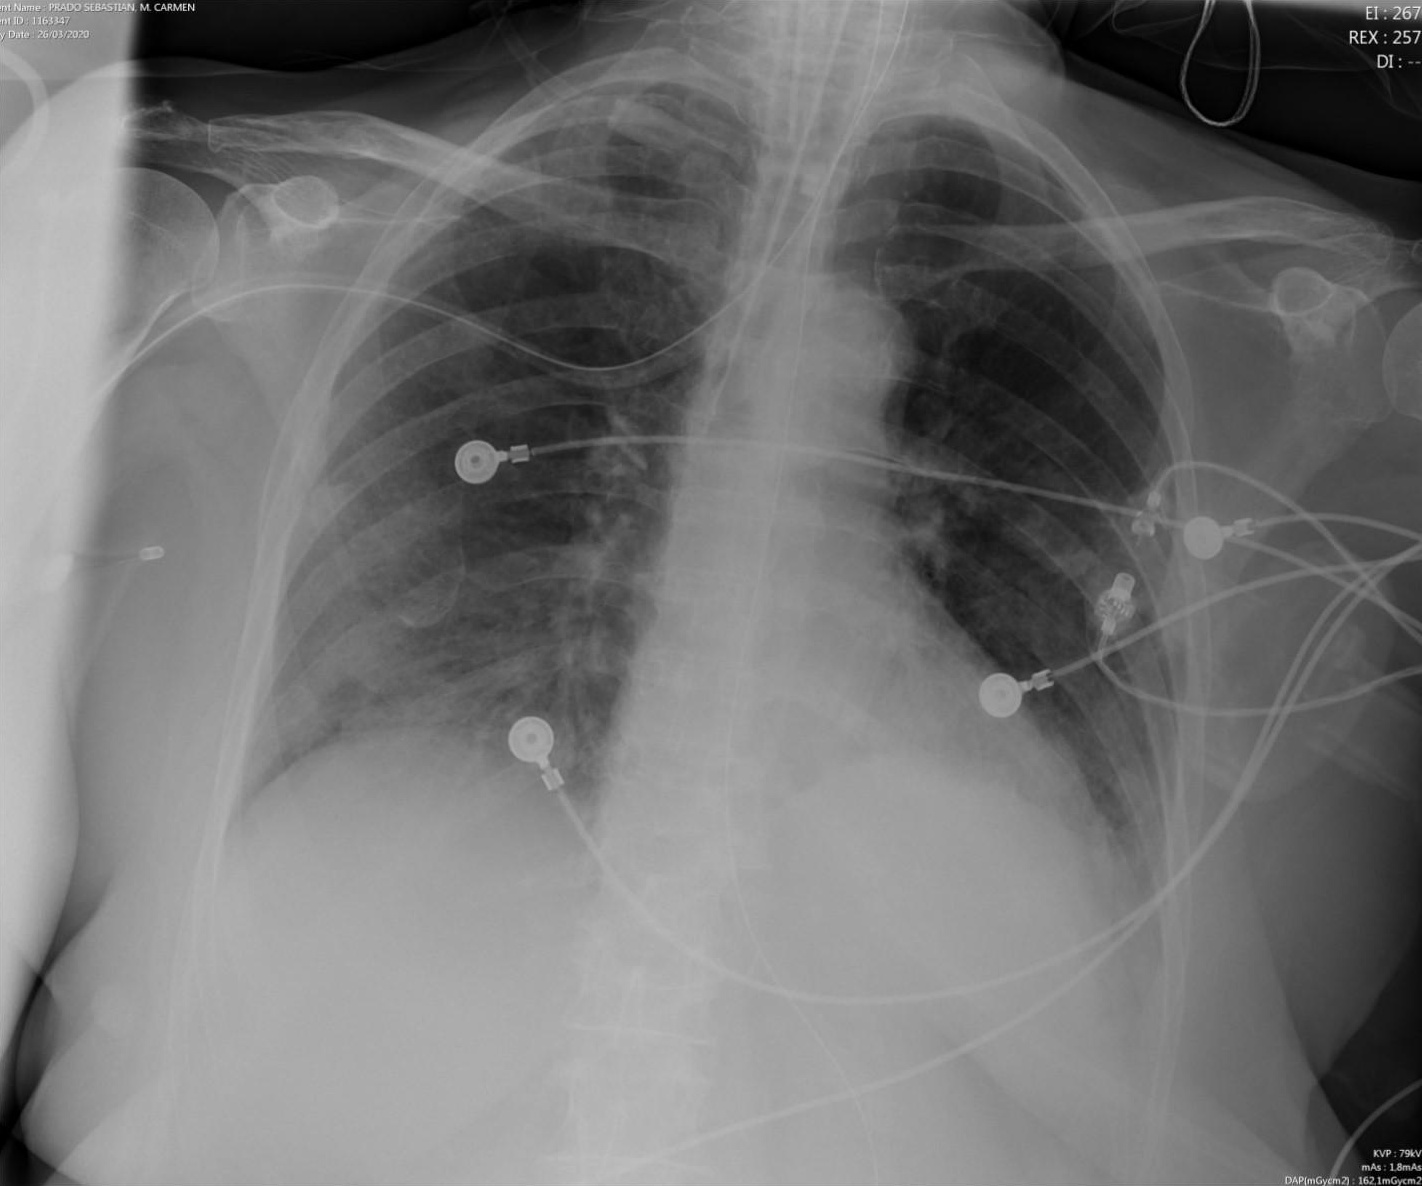

In [44]:
print("Image Label: ", train_df.label[5])
load_img(train_df.image_path[5])

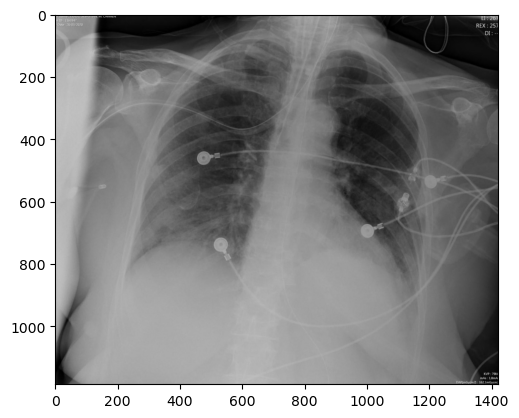

In [45]:
random_image = load_img(train_df.image_path[5])
plt.imshow(random_image)

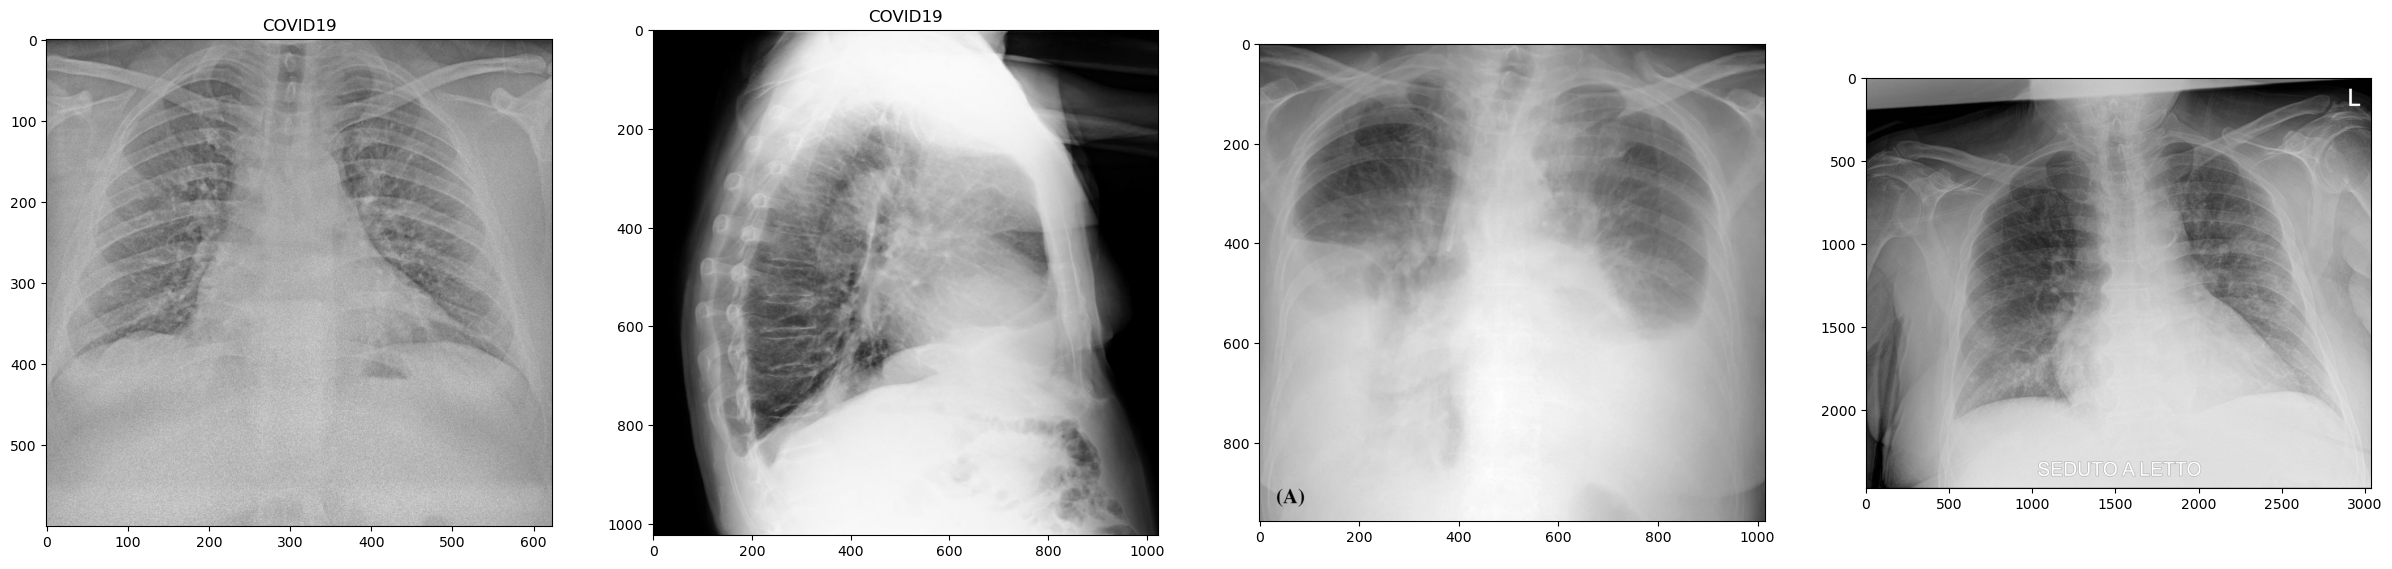

In [46]:
# Plotting/Showing the figures
plt.figure(figsize=(30,20))
plt.subplot(1,4,1)
random_image = load_img(train_df.image_path[10])
plt.imshow(random_image)
plt.title(train_df.label[10])
plt.subplot(1,4,2)
random_image = load_img(train_df.image_path[291])
plt.imshow(random_image)
plt.title(train_df.label[10])

plt.subplot(1,4,3)
random_image = load_img(train_df.image_path[29])
plt.imshow(random_image)
plt.subplot(1,4,4)
random_image = load_img(train_df.image_path[299])
plt.imshow(random_image)

### Model Development

In [47]:
# Load the data (assuming you have a dataset with 'train' and 'test' folders)
train_data_dir = TRAIN_PATH#'/path/to/train'
test_data_dir = TEST_PATH#'/path/to/test'

In [48]:
# Define data generators with data augmentation for training
train_datagen = ImageDataGenerator()

test_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [49]:
# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [50]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
)

Epoch 1/10
161/161 [==============================] - 320s 2s/step - loss: 18.4048 - accuracy: 0.8350 - val_loss: 0.3045 - val_accuracy: 0.8882
Epoch 2/10
161/161 [==============================] - 228s 1s/step - loss: 0.3252 - accuracy: 0.9026 - val_loss: 0.6344 - val_accuracy: 0.7679
Epoch 3/10
161/161 [==============================] - 230s 1s/step - loss: 0.5404 - accuracy: 0.8455 - val_loss: 0.2693 - val_accuracy: 0.9154
Epoch 4/10
161/161 [==============================] - 240s 1s/step - loss: 0.1964 - accuracy: 0.9304 - val_loss: 0.3229 - val_accuracy: 0.9061
Epoch 5/10
161/161 [==============================] - 244s 2s/step - loss: 0.1291 - accuracy: 0.9551 - val_loss: 0.3195 - val_accuracy: 0.9084
Epoch 6/10
 44/161 [=======>......................] - ETA: 2:40 - loss: 0.0963 - accuracy: 0.9645

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc}')